In [872]:
import pandas as pd

In [873]:
train_df = pd.read_excel('train.xlsx')
train_df = train_df.sort_values(by='dt')
train_df.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [874]:
train_df.head(13)

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
5,2015-02-09,30300
6,2015-02-16,30100
7,2015-02-23,29400
8,2015-03-02,29200
9,2015-03-09,29000


In [875]:
train_df.isna().sum()

,0
dt,0
Цена на арматуру,0


In [876]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [877]:
train_df.set_index('dt', inplace=True)

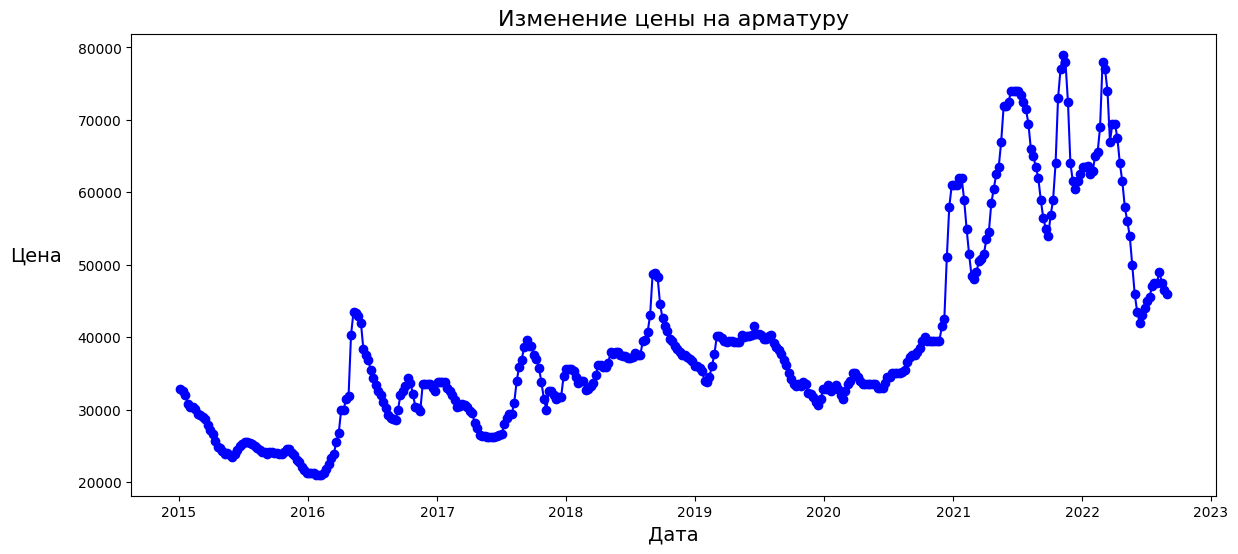

In [878]:
import matplotlib.pyplot as plt

# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Изменение цены на арматуру', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Цена', rotation=0, labelpad=30, fontsize=14)
plt.plot(train_df.index, train_df['Цена на арматуру'], marker='o', linestyle='-', color='b')

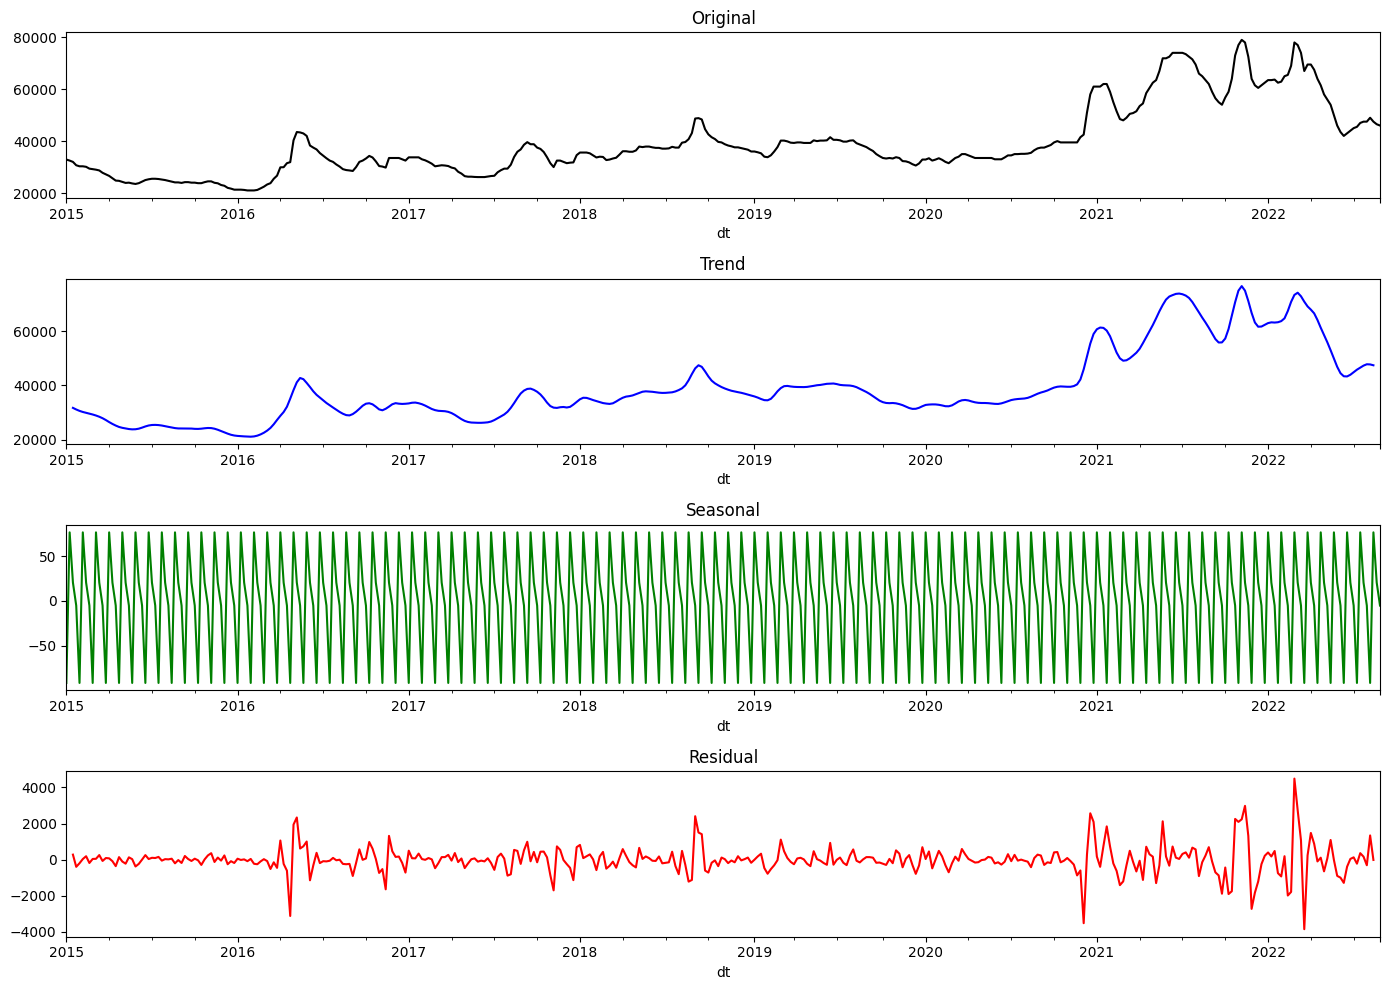

In [879]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?

from statsmodels.tsa.seasonal import seasonal_decompose

# Выполняем декомпозицию
decomposition = seasonal_decompose(train_df["Цена на арматуру"], model="additive", period=4)

# Визуализация
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 10))
ax[0].set_title("Original")
ax[1].set_title("Trend")
ax[2].set_title("Seasonal")
ax[3].set_title("Residual")

decomposition.observed.plot(ax=ax[0], color="black")
decomposition.trend.plot(ax=ax[1], color="blue")
decomposition.seasonal.plot(ax=ax[2], color="green")
decomposition.resid.plot(ax=ax[3], color="red")

plt.tight_layout()
plt.show()

<ipython-input-880-65829c42fcc0>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_price = train_df.resample('M').mean()


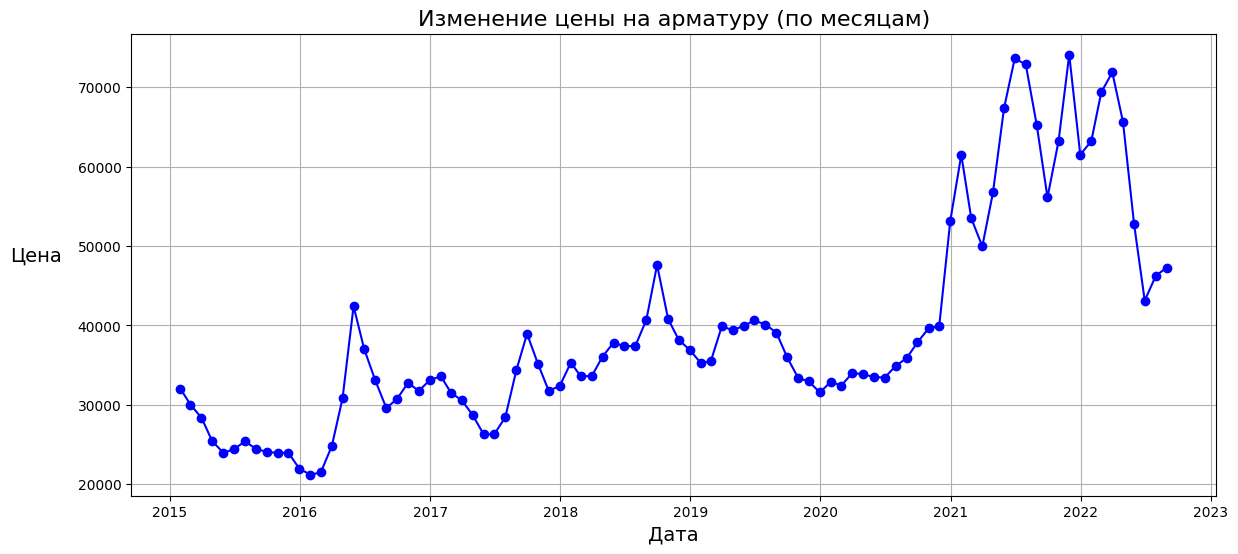

In [880]:
import matplotlib.pyplot as plt
import pandas as pd

# Убеждаемся, что индекс — это datetime
train_df.index = pd.to_datetime(train_df.index)

# Группируем по месяцам и берем среднее значение
monthly_avg_price = train_df.resample('M').mean()

# Визуализация
plt.figure(figsize=(14, 6))
plt.title('Изменение цены на арматуру (по месяцам)', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Цена', rotation=0, labelpad=30, fontsize=14)
plt.plot(monthly_avg_price.index, monthly_avg_price['Цена на арматуру'], marker='o', linestyle='-', color='b')

plt.grid(True)
plt.show()


In [881]:
from statsmodels.tsa.stattools import adfuller
# Проверка стационарности
adf_test = adfuller(train_df["Цена на арматуру"])
print(f"ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}")

# Ряд является нестационарным

ADF Statistic: -1.9258699893713456, p-value: 0.31999061025699155


In [882]:
train_df['diff_1'] = train_df['Цена на арматуру'].diff()

# Проверка стационарности после первого дифференцирования
adf_test_diff1 = adfuller(train_df['diff_1'].dropna())

print("\nТест Дики-Фуллера после первого дифференцирования:")
print(f"ADF-статистика: {adf_test_diff1[0]}")
print(f"p-значение: {adf_test_diff1[1]}")
print(f"Критические значения: {adf_test_diff1[4]}")

if adf_test_diff1[1] < 0.05:
    print("Ряд стал стационарным после первого дифференцирования.")
else:
    print("Ряд все еще не стационарен, попробуем второе дифференцирование.")


Тест Дики-Фуллера после первого дифференцирования:
ADF-статистика: -7.706061504115209
p-значение: 1.300693837380985e-11
Критические значения: {'1%': np.float64(-3.447405233596701), '5%': np.float64(-2.8690569369014605), '10%': np.float64(-2.5707743450830893)}
Ряд стал стационарным после первого дифференцирования.


автокорреляция

In [883]:
from statsmodels.tsa.stattools import acf

acf(train_df['Цена на арматуру'], nlags=60, fft=False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023])

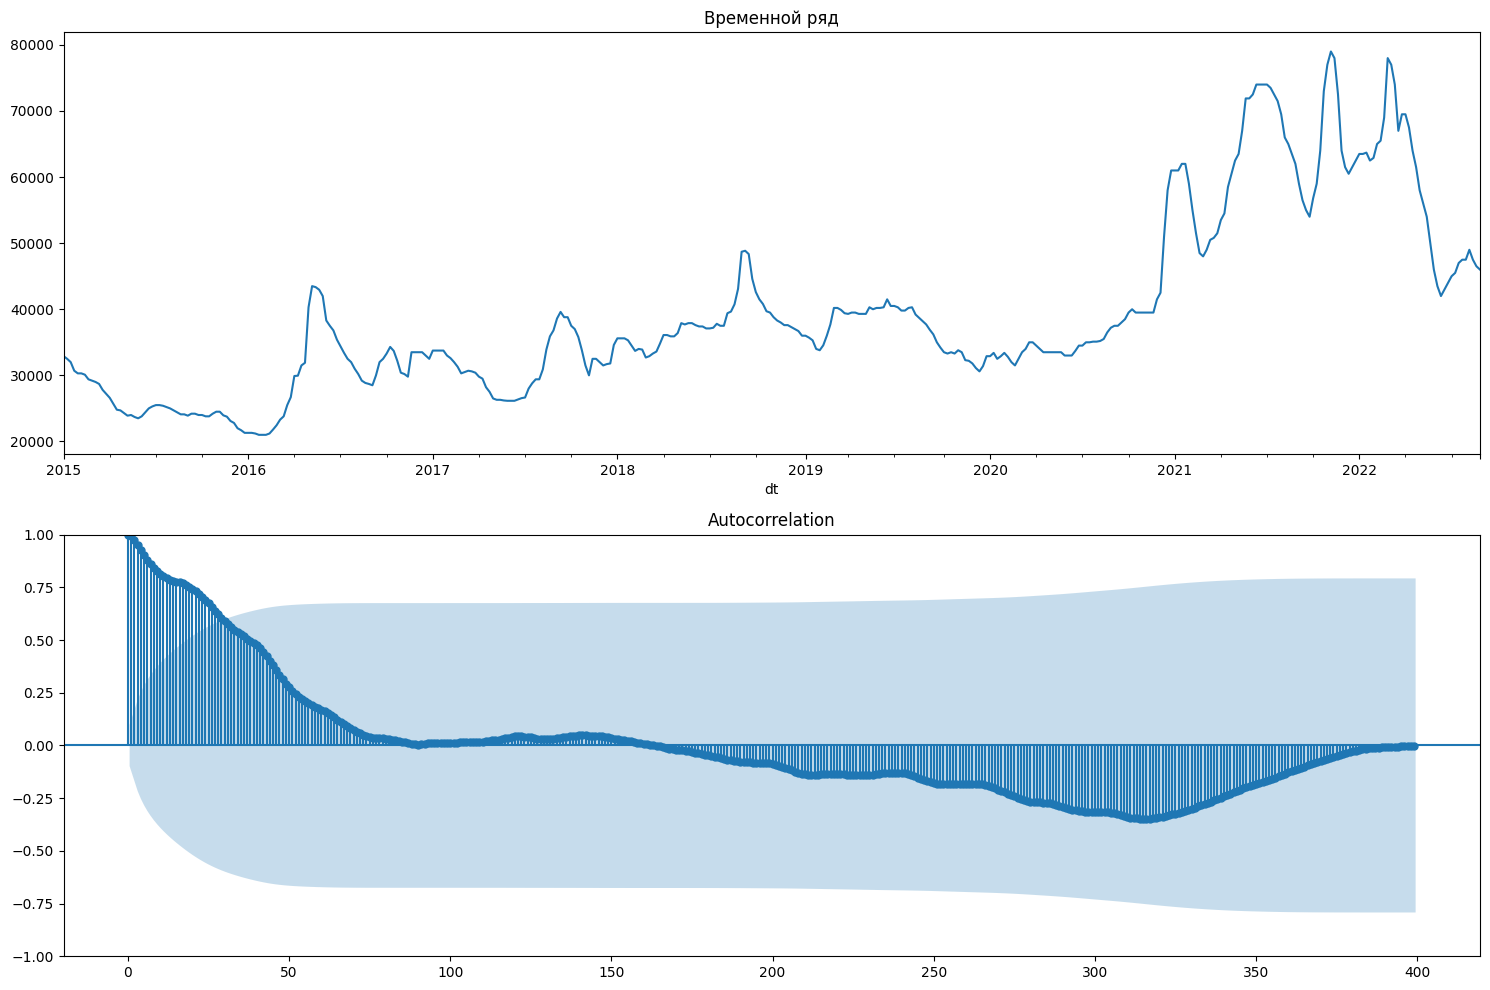

In [884]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# График временного ряда
train_df['Цена на арматуру'].plot(ax=ax[0], title="Временной ряд")

# График автокорреляции (с корректным числом лагов)
plot_acf(train_df['Цена на арматуру'], lags=len(train_df)-1, ax=ax[1])

plt.tight_layout()
plt.show()

In [885]:
test_df = pd.read_excel('test.xlsx')

In [886]:
from sklearn.model_selection import train_test_split

X = np.arange(len(train_df)).reshape(-1, 1)
y = train_df['Цена на арматуру'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Модель линейной регрессии

In [887]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

linreg_preds = linreg_model.predict(X_test)

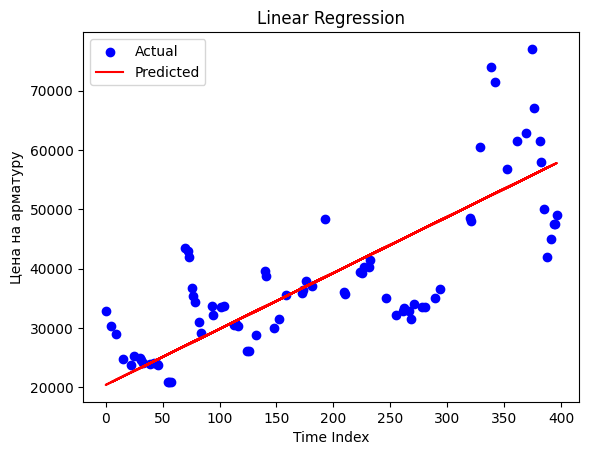

In [888]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, linreg_preds, color='red', label='Predicted')
plt.xlabel('Time Index')
plt.ylabel('Цена на арматуру')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [889]:
from sklearn.metrics import r2_score, mean_absolute_error

rlinreg_mae = mean_absolute_error(y_test, linreg_preds)
linreg_r2 = r2_score(y_test, linreg_preds)

In [890]:
linreg_r2

0.5499686059982285

In [891]:
rlinreg_mae

6501.972556896328

Decision Tree

In [892]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)

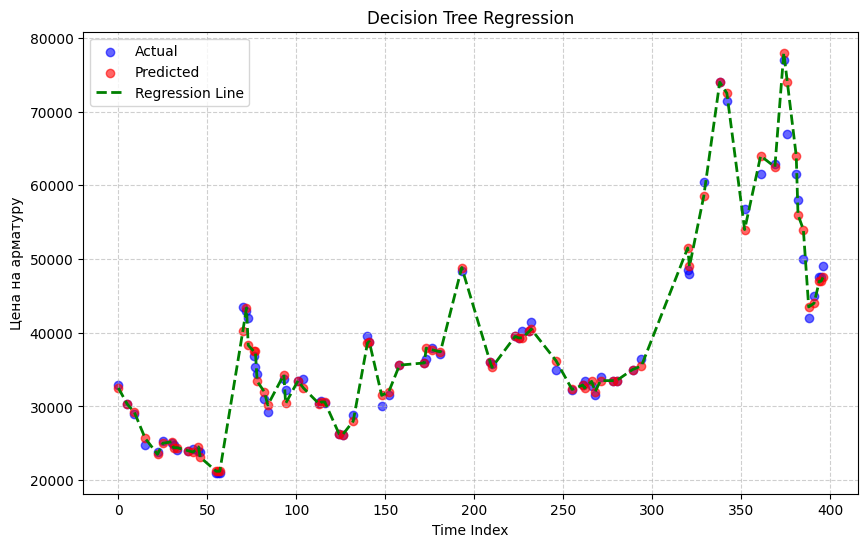

In [893]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, tree_preds, color='red', label='Predicted', alpha=0.6)
plt.plot(sorted(X_test.flatten()), tree_model.predict(np.array(sorted(X_test.flatten())).reshape(-1, 1)), color='green', linestyle='dashed', linewidth=2, label='Regression Line')
plt.xlabel('Time Index')
plt.ylabel('Цена на арматуру')
plt.title('Decision Tree Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [894]:
tree_mae = mean_absolute_error(y_test, tree_preds)
tree_r2 = r2_score(y_test, tree_preds)

In [895]:
print(f"Decision Tree MAE: {tree_mae}")

Decision Tree MAE: 878.125


In [896]:
print(f"Decision Tree R2 Score: {tree_r2}")

Decision Tree R2 Score: 0.9870840011609869


Модель  XGBRegressor

In [897]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

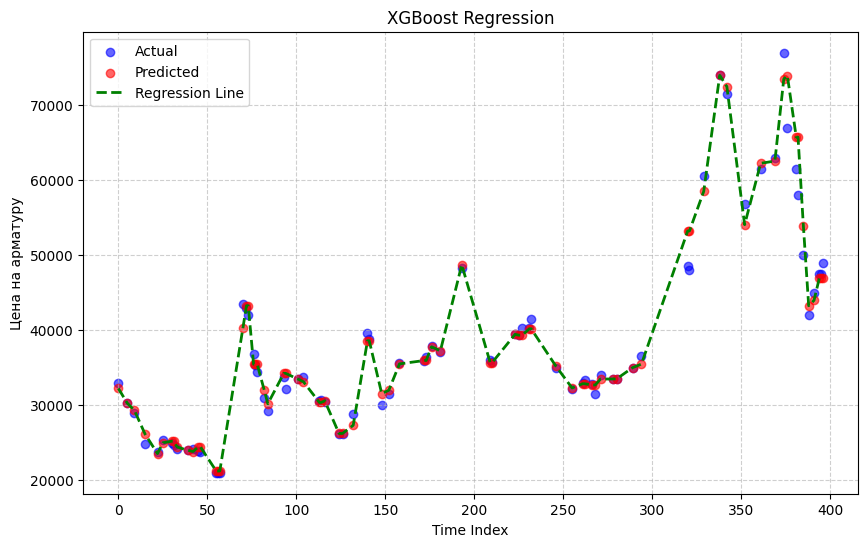

In [898]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, xgb_preds, color='red', label='Predicted', alpha=0.6)
plt.plot(sorted(X_test.flatten()), xgb_model.predict(np.array(sorted(X_test.flatten())).reshape(-1, 1)), color='green', linestyle='dashed', linewidth=2, label='Regression Line')
plt.xlabel('Time Index')
plt.ylabel('Цена на арматуру')
plt.title('XGBoost Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [899]:
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

In [900]:
print(f'MAE: {xgb_mae}')
print(f'R²: {xgb_r2}')

MAE: 1007.5347900390625
R²: 0.9793338775634766
